In [28]:
from collections import defaultdict
data = defaultdict(list)

with open('out.txt', 'r') as f:
    for line in f:
        n, num_threads, _, time = line.strip().split(' ')
        data[int(num_threads)].append(float(time))

In [29]:
data

defaultdict(list,
            {1: [0.0011676,
              0.0118334,
              0.1107585,
              0.9598804,
              17.1469807,
              213.37125],
             2: [0.0006419,
              0.0055103,
              0.0643417,
              0.5174721,
              8.1627409,
              103.423221],
             4: [0.0007306,
              0.0032912,
              0.0471387,
              0.3271599,
              4.2316269,
              66.0505887],
             8: [0.0004985,
              0.0028421,
              0.0270255,
              0.2150695,
              2.8878018,
              44.471885],
             16: [0.0007818,
              0.00308,
              0.0256832,
              0.2222899,
              2.9954642,
              47.5498993]})

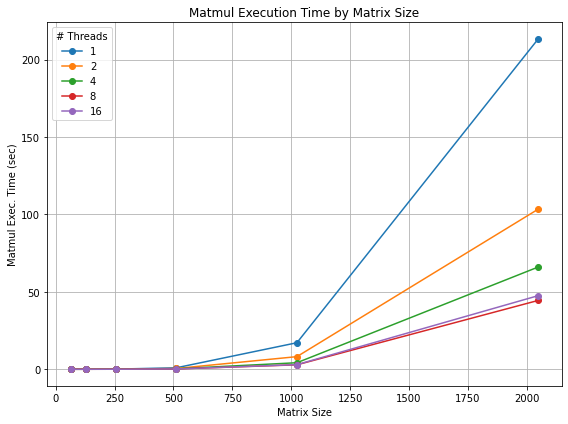

In [45]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(8, 6), tight_layout=True)
ax.set_title('Matmul Execution Time by Matrix Size')
ax.set_xlabel('Matrix Size')
ax.set_ylabel('Matmul Exec. Time (sec)')
ax.grid()

N = [64, 128, 256, 512, 1024, 2048]
for num_threads, times in data.items():
    ax.plot(N, times, label=num_threads, marker='o')
ax.legend(title="# Threads")

plt.show()

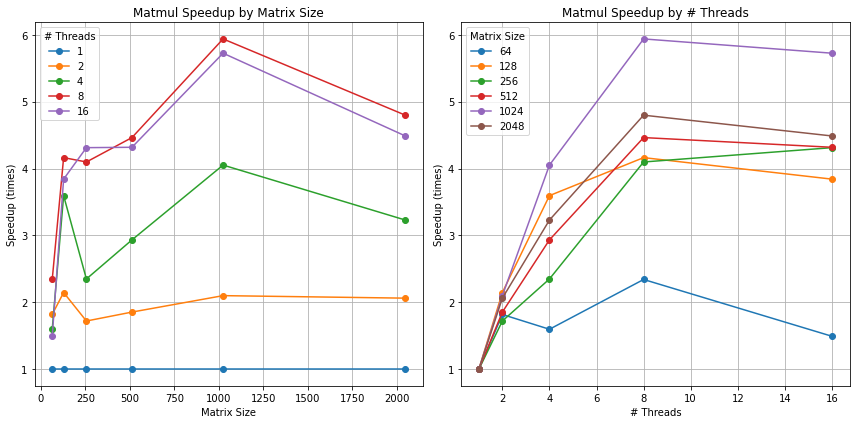

In [53]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(12, 6), tight_layout=True)

axs[0].set_title('Matmul Speedup by Matrix Size')
axs[0].set_xlabel('Matrix Size')
axs[0].set_ylabel('Speedup (times)')
axs[0].grid()

axs[1].set_title('Matmul Speedup by # Threads')
axs[1].set_xlabel('# Threads')
axs[1].set_ylabel('Speedup (times)')
axs[1].grid()

Ns = [64, 128, 256, 512, 1024, 2048]

speedup_by_N = defaultdict(list)

for num_threads, times in data.items():
    speedup_by_threads = []
    for N, single_time, multi_time in zip(Ns, data[1], times):
        speedup = single_time / multi_time
        speedup_by_threads.append(speedup)
        speedup_by_N[N].append(speedup)
    axs[0].plot(Ns, speedup_by_threads, label=num_threads, marker='o')
axs[0].legend(title="# Threads")

for N, speedup in speedup_by_N.items():
    axs[1].plot([1, 2, 4, 8, 16], speedup, label=N, marker='o')
axs[1].legend(title="Matrix Size")

plt.show()